 # WATER POTABILITY PREDICTION MODEL

The dataset used for this model was gotten from https://www.hydroshare.org/resource/4ab43e1b507b496b9b42749701daed5c/

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
df = pd.read_excel('Datasets/aquaattributes.xlsx')

In [3]:
df.head(20)

,Stationcode,Locations,Lat,Lon,Capitalcity,State,Temperature,D.O,pH,Conductivity,B.O.D,Nitrate,Fecalcaliform,Totalcaliform,class
0,1001,BEAS AT U/S MANALI,32.244947,77.191080,Shimla,HIMACHAL PRADESH,9.0,9.0,8.0,85,0.10,0.2,106,397.0,yes
1,1002,BEAS AT D/S KULU,31.960582,77.114009,Shimla,HIMACHAL PRADESH,10.0,9.0,8.0,102,0.30,0.4,153,954.0,yes
2,1003,BEAS AT D/S AUT,26.887893,75.811484,Shimla,HIMACHAL PRADESH,11.0,9.0,8.0,96,0.20,0.3,58,653.0,yes
3,1004,BEAS AT U/S PANDON DAM,47.351943,19.633621,Shimla,HIMACHAL PRADESH,13.0,9.0,8.0,94,0.20,0.4,34,317.0,yes
4,1005,BEAS AT EXIT OF TUNNEL DEHAL POWER HOUSE,25.992786,91.826111,Shimla,HIMACHAL PRADESH,14.0,10.0,8.0,112,0.20,0.5,213,1072.0,yes
5,1550,U/S MANDI,31.708165,76.931367,Shimla,HIMACHAL PRADESH,16.0,9.0,8.0,117,0.20,0.5,100,722.0,yes
6,1006,BEAS AT D/S MANDI,31.708165,76.931367,Shimla,HIMACHAL PRADESH,16.0,9.0,8.0,155,0.50,0.7,445,1855.0,yes
7,2604,BEAS AT D/S JAISINGHPUR,31.899643,76.597945,Shimla,HIMACHAL PRADESH,19.0,8.0,8.0,211,0.50,0.5,7,72.0,yes
8,1007,BEAS AT D/S ALAMPUR,15.884349,78.119382,Shimla,HIMACHAL PRADESH,19.0,8.0,8.0,202,0.60,0.4,9,123.0,yes
9,1008,BEAS AT D/S DEHRAGOPIPUR,31.881756,76.214645,Shimla,HIMACHAL PRADESH,19.0,8.0,8.0,280,0.70,1.1,10,157.0,yes


In [4]:
df.shape

(1361, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1361 entries, 0 to 1360
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Stationcode    1361 non-null   int64  
 1   Locations      1361 non-null   object 
 2   Lat            1294 non-null   float64
 3   Lon            1294 non-null   float64
 4   Capitalcity    1361 non-null   object 
 5   State          1360 non-null   object 
 6   Temperature    1327 non-null   float64
 7   D.O            1352 non-null   float64
 8   pH             1360 non-null   float64
 9   Conductivity   1324 non-null   object 
 10  B.O.D          1293 non-null   float64
 11  Nitrate        1152 non-null   object 
 12  Fecalcaliform  1173 non-null   object 
 13  Totalcaliform  1226 non-null   float64
 14  class          1361 non-null   object 
dtypes: float64(7), int64(1), object(7)
memory usage: 159.6+ KB


In [6]:
df.isnull().sum()

Stationcode        0
Locations          0
Lat               67
Lon               67
Capitalcity        0
State              1
Temperature       34
D.O                9
pH                 1
Conductivity      37
B.O.D             68
Nitrate          209
Fecalcaliform    188
Totalcaliform    135
class              0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(967, 15)

In [9]:
df.isnull().sum()

Stationcode      0
Locations        0
Lat              0
Lon              0
Capitalcity      0
State            0
Temperature      0
D.O              0
pH               0
Conductivity     0
B.O.D            0
Nitrate          0
Fecalcaliform    0
Totalcaliform    0
class            0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 967 entries, 0 to 1360
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Stationcode    967 non-null    int64  
 1   Locations      967 non-null    object 
 2   Lat            967 non-null    float64
 3   Lon            967 non-null    float64
 4   Capitalcity    967 non-null    object 
 5   State          967 non-null    object 
 6   Temperature    967 non-null    float64
 7   D.O            967 non-null    float64
 8   pH             967 non-null    float64
 9   Conductivity   967 non-null    object 
 10  B.O.D          967 non-null    float64
 11  Nitrate        967 non-null    object 
 12  Fecalcaliform  967 non-null    object 
 13  Totalcaliform  967 non-null    float64
 14  class          967 non-null    object 
dtypes: float64(7), int64(1), object(7)
memory usage: 120.9+ KB


In [11]:
cndt = df['Conductivity']

In [12]:
[x for x in cndt.apply(type).unique()]

[int, float]

In [13]:
df['Conductivity'] = df['Conductivity'].astype(float)

In [14]:
nitr = df['Nitrate']

In [15]:
[x for x in nitr.apply(type).unique()]

[float, int]

In [16]:
df['Nitrate'] = df['Nitrate'].astype(float)

In [17]:
fclf = df['Fecalcaliform']

In [18]:
[x for x in fclf.apply(type).unique()]

[int, float]

In [19]:
df['Fecalcaliform'] = df['Fecalcaliform'].astype(float)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 967 entries, 0 to 1360
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Stationcode    967 non-null    int64  
 1   Locations      967 non-null    object 
 2   Lat            967 non-null    float64
 3   Lon            967 non-null    float64
 4   Capitalcity    967 non-null    object 
 5   State          967 non-null    object 
 6   Temperature    967 non-null    float64
 7   D.O            967 non-null    float64
 8   pH             967 non-null    float64
 9   Conductivity   967 non-null    float64
 10  B.O.D          967 non-null    float64
 11  Nitrate        967 non-null    float64
 12  Fecalcaliform  967 non-null    float64
 13  Totalcaliform  967 non-null    float64
 14  class          967 non-null    object 
dtypes: float64(10), int64(1), object(4)
memory usage: 120.9+ KB


In [21]:
df.describe()

,Stationcode,Lat,Lon,Temperature,D.O,pH,Conductivity,B.O.D,Nitrate,Fecalcaliform,Totalcaliform
count,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,9.670000e+02,9.670000e+02
mean,1899.374354,20.970569,78.364700,25.355714,6.891423,7.668664,1323.534458,3.738066,5.075913,1.773840e+05,5.361407e+05
std,706.222881,6.459671,6.894196,4.413136,1.674220,0.478087,3703.988886,8.546417,30.069937,3.792506e+06,1.015845e+07
min,4.000000,8.388518,19.633621,5.000000,0.000000,5.200000,25.250000,0.000000,0.000000,1.400000e+00,5.000000e-03
25%,1326.500000,17.000538,74.970558,24.000000,6.200000,7.450000,201.500000,1.021250,0.304167,1.579167e+01,5.000000e+01
50%,1960.000000,21.007658,76.852727,26.458333,7.091667,7.788333,388.000000,2.091667,0.800000,1.441667e+02,4.650000e+02
75%,2515.500000,26.234941,80.964831,27.908333,7.750000,8.000000,754.333333,3.936667,2.000000,8.245833e+02,1.746665e+03
max,3029.000000,47.351943,95.999123,37.500000,30.366667,9.575000,36593.000000,158.750000,640.000000,1.100000e+08,2.500000e+08


In [22]:
df_new = df.loc[:,['Temperature','D.O','pH','Conductivity','B.O.D','Nitrate','Fecalcaliform','Totalcaliform','class']]

In [23]:
df_new['class'] = df_new['class'] == 'yes'

In [24]:
df_new.head()

,Temperature,D.O,pH,Conductivity,B.O.D,Nitrate,Fecalcaliform,Totalcaliform,class
0,9.0,9.0,8.0,85.0,0.1,0.2,106.0,397.0,True
1,10.0,9.0,8.0,102.0,0.3,0.4,153.0,954.0,True
2,11.0,9.0,8.0,96.0,0.2,0.3,58.0,653.0,True
3,13.0,9.0,8.0,94.0,0.2,0.4,34.0,317.0,True
4,14.0,10.0,8.0,112.0,0.2,0.5,213.0,1072.0,True


In [25]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 967 entries, 0 to 1360
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    967 non-null    float64
 1   D.O            967 non-null    float64
 2   pH             967 non-null    float64
 3   Conductivity   967 non-null    float64
 4   B.O.D          967 non-null    float64
 5   Nitrate        967 non-null    float64
 6   Fecalcaliform  967 non-null    float64
 7   Totalcaliform  967 non-null    float64
 8   class          967 non-null    bool   
dtypes: bool(1), float64(8)
memory usage: 68.9 KB


In [26]:
df_new.corr()

,Temperature,D.O,pH,Conductivity,B.O.D,Nitrate,Fecalcaliform,Totalcaliform,class
Temperature,1.000000,-0.137697,-0.062000,0.132268,0.059620,0.026301,-0.013133,-0.013379,-0.162458
D.O,-0.137697,1.000000,0.194636,-0.092865,-0.280783,0.011558,-0.165299,-0.182276,-0.147469
pH,-0.062000,0.194636,1.000000,-0.008232,-0.004717,-0.147210,0.008265,0.009426,-0.298328
Conductivity,0.132268,-0.092865,-0.008232,1.000000,0.164644,-0.008017,-0.003694,-0.003406,0.069188
B.O.D,0.059620,-0.280783,-0.004717,0.164644,1.000000,0.004074,0.053959,0.063619,0.047831
Nitrate,0.026301,0.011558,-0.147210,-0.008017,0.004074,1.000000,-0.005780,-0.006528,0.005181
Fecalcaliform,-0.013133,-0.165299,0.008265,-0.003694,0.053959,-0.005780,1.000000,0.848463,0.024510
Totalcaliform,-0.013379,-0.182276,0.009426,-0.003406,0.063619,-0.006528,0.848463,1.000000,0.027741
class,-0.162458,-0.147469,-0.298328,0.069188,0.047831,0.005181,0.024510,0.027741,1.000000


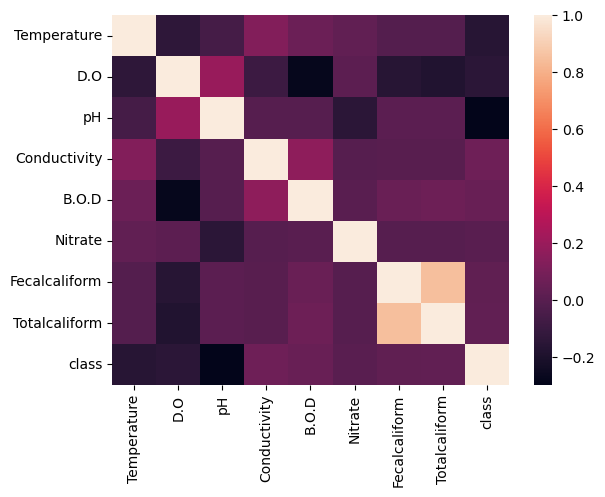

In [27]:
sns.heatmap(df_new.corr());

In [28]:
X = df.loc[:,['Temperature','D.O','pH','Conductivity','B.O.D','Nitrate','Totalcaliform']]

In [29]:
df_new = df.loc[:,['Temperature','D.O','pH','Conductivity','B.O.D','Nitrate','Fecalcaliform','Totalcaliform','class']]

In [30]:
df_new['class'] = df_new['class'] == 'yes'

In [31]:
df_new.head()

,Temperature,D.O,pH,Conductivity,B.O.D,Nitrate,Fecalcaliform,Totalcaliform,class
0,9.0,9.0,8.0,85.0,0.1,0.2,106.0,397.0,True
1,10.0,9.0,8.0,102.0,0.3,0.4,153.0,954.0,True
2,11.0,9.0,8.0,96.0,0.2,0.3,58.0,653.0,True
3,13.0,9.0,8.0,94.0,0.2,0.4,34.0,317.0,True
4,14.0,10.0,8.0,112.0,0.2,0.5,213.0,1072.0,True


In [32]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 967 entries, 0 to 1360
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    967 non-null    float64
 1   D.O            967 non-null    float64
 2   pH             967 non-null    float64
 3   Conductivity   967 non-null    float64
 4   B.O.D          967 non-null    float64
 5   Nitrate        967 non-null    float64
 6   Fecalcaliform  967 non-null    float64
 7   Totalcaliform  967 non-null    float64
 8   class          967 non-null    bool   
dtypes: bool(1), float64(8)
memory usage: 68.9 KB


In [33]:
df_new.corr()

,Temperature,D.O,pH,Conductivity,B.O.D,Nitrate,Fecalcaliform,Totalcaliform,class
Temperature,1.000000,-0.137697,-0.062000,0.132268,0.059620,0.026301,-0.013133,-0.013379,-0.162458
D.O,-0.137697,1.000000,0.194636,-0.092865,-0.280783,0.011558,-0.165299,-0.182276,-0.147469
pH,-0.062000,0.194636,1.000000,-0.008232,-0.004717,-0.147210,0.008265,0.009426,-0.298328
Conductivity,0.132268,-0.092865,-0.008232,1.000000,0.164644,-0.008017,-0.003694,-0.003406,0.069188
B.O.D,0.059620,-0.280783,-0.004717,0.164644,1.000000,0.004074,0.053959,0.063619,0.047831
Nitrate,0.026301,0.011558,-0.147210,-0.008017,0.004074,1.000000,-0.005780,-0.006528,0.005181
Fecalcaliform,-0.013133,-0.165299,0.008265,-0.003694,0.053959,-0.005780,1.000000,0.848463,0.024510
Totalcaliform,-0.013379,-0.182276,0.009426,-0.003406,0.063619,-0.006528,0.848463,1.000000,0.027741
class,-0.162458,-0.147469,-0.298328,0.069188,0.047831,0.005181,0.024510,0.027741,1.000000


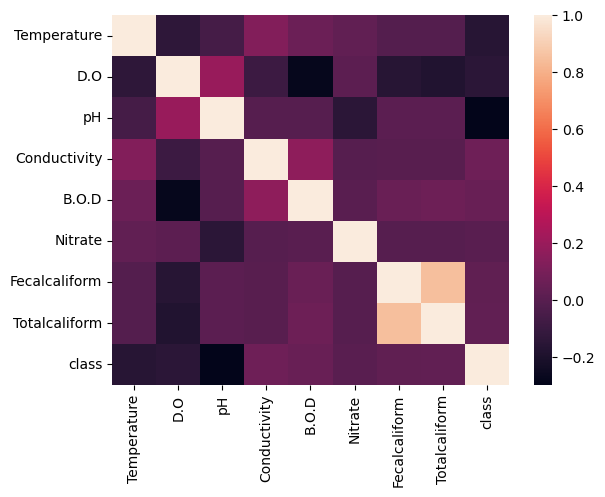

In [34]:
sns.heatmap(df_new.corr());

In [35]:
X = df.loc[:,['Temperature','D.O','pH','Conductivity','B.O.D','Nitrate','Totalcaliform']]

In [36]:
X.head()

,Temperature,D.O,pH,Conductivity,B.O.D,Nitrate,Totalcaliform
0,9.0,9.0,8.0,85.0,0.1,0.2,397.0
1,10.0,9.0,8.0,102.0,0.3,0.4,954.0
2,11.0,9.0,8.0,96.0,0.2,0.3,653.0
3,13.0,9.0,8.0,94.0,0.2,0.4,317.0
4,14.0,10.0,8.0,112.0,0.2,0.5,1072.0


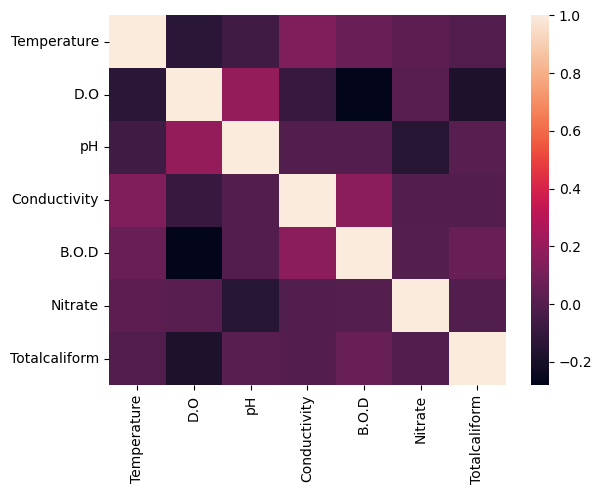

In [37]:
sns.heatmap(X.corr());

In [38]:
[x for x in df['class'].apply(type).unique()]

[str]

In [39]:
df_new['class'].unique()

array([ True, False])

In [40]:
y = df_new['class']

In [41]:
y.value_counts()

class
True     751
False    216
Name: count, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.8, random_state = 123)

In [44]:
X_train.shape

(773, 7)

In [45]:
y_train.shape

(773,)

In [46]:
X_val.shape

(194, 7)

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [48]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]

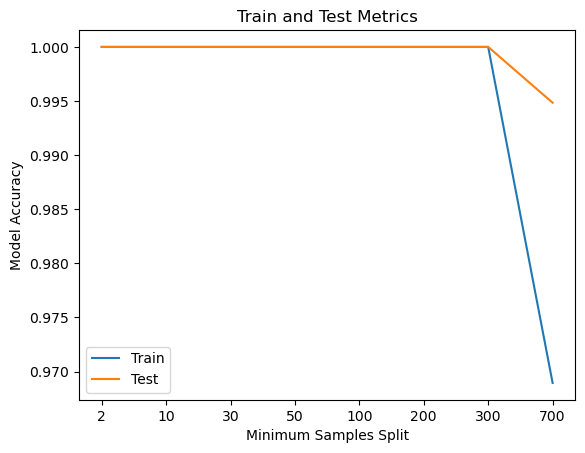

In [49]:
accuracy_list_train = []
f1_list_train = []
accuracy_list_val = []
f1_list_val = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(min_samples_split = min_samples_split,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    f1_train = f1_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    f1_val = f1_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    f1_list_train.append(f1_train)
    accuracy_list_val.append(accuracy_val)
    f1_list_val.append(f1_val)

plt.title('Train and Test Metrics')
plt.xlabel('Minimum Samples Split')
plt.ylabel('Model Accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Test']);

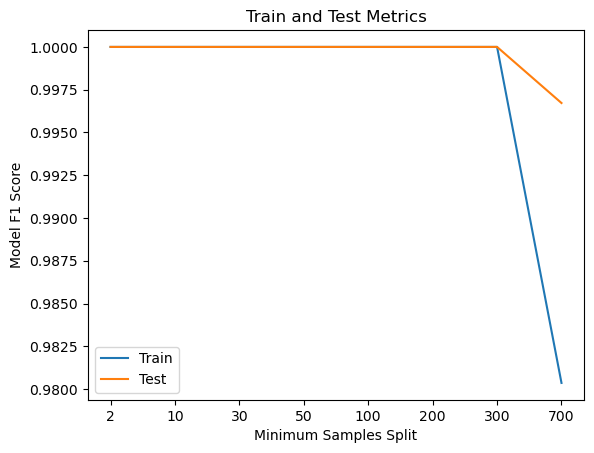

In [50]:
plt.title('Train and Test Metrics')
plt.xlabel('Minimum Samples Split')
plt.ylabel('Model F1 Score')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(f1_list_train)
plt.plot(f1_list_val)
plt.legend(['Train','Test']);

In [51]:
accuracy_list_train

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9689521345407504]

In [52]:
accuracy_list_val

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9948453608247423]

In [53]:
f1_list_train

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9803600654664485]

In [54]:
f1_list_val

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9967213114754099]

In [58]:
y_val.value_counts()

class
True     152
False     42
Name: count, dtype: int64

In [59]:
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None]

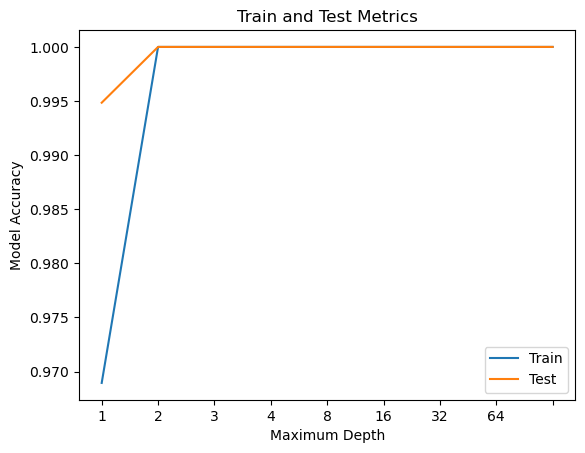

In [60]:
accuracy_list_train = []
f1_list_train = []
accuracy_list_val = []
f1_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(max_depth = max_depth,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    f1_train = f1_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    f1_val = f1_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    f1_list_train.append(f1_train)
    accuracy_list_val.append(accuracy_val)
    f1_list_val.append(f1_val)

plt.title('Train and Test Metrics')
plt.xlabel('Maximum Depth')
plt.ylabel('Model Accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Test']);

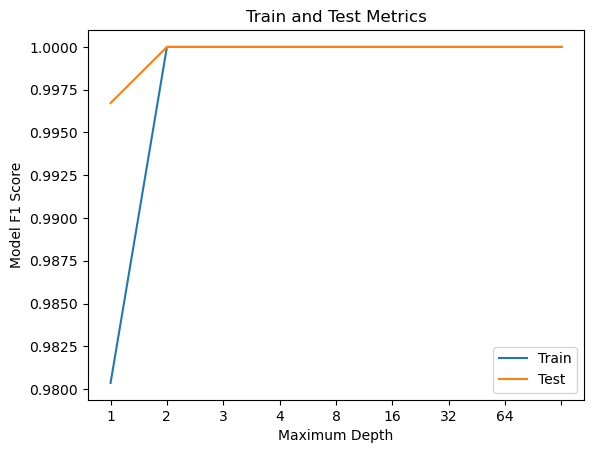

In [62]:
plt.title('Train and Test Metrics')
plt.xlabel('Maximum Depth')
plt.ylabel('Model F1 Score')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(f1_list_train)
plt.plot(f1_list_val)
plt.legend(['Train','Test']);

In [57]:
accuracy_list_train

[0.9689521345407504, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [58]:
f1_list_train

[0.9803600654664485, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [59]:
accuracy_list_val

[0.9948453608247423, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [60]:
f1_list_val

[0.9967213114754099, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

    Chosen max_depth = 4
    Chosen min_samples_split = 50

In [61]:
decision_tree_model = DecisionTreeClassifier(min_samples_split = 50,
                                             max_depth = 4,
                                             random_state = 123).fit(X_train,y_train)

In [62]:
for feature, importance in tuple(zip(decision_tree_model.feature_names_in_,
                                     decision_tree_model.feature_importances_)):
    print(f"{feature}: {importance:.4f}")

Temperature: 0.0000
D.O: 0.0000
pH: 1.0000
Conductivity: 0.0000
B.O.D: 0.0000
Nitrate: 0.0000
Totalcaliform: 0.0000


In [63]:
print(f"Accuracy for train:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_train),y_train):.4f}")
print(f"f1 for train:\n\tf1 score: {f1_score(decision_tree_model.predict(X_train),y_train):.4f}")
print(f"Accuracy for validation:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_val),y_val):.4f}")
print(f"f1 for validation:\n\tf1 score: {f1_score(decision_tree_model.predict(X_val),y_val):.4f}")

Accuracy for train:
	Accuracy score: 1.0000
f1 for train:
	f1 score: 1.0000
Accuracy for validation:
	Accuracy score: 1.0000
f1 for validation:
	f1 score: 1.0000


In [64]:
check = decision_tree_model.predict(X) == df_new['class']

In [65]:
check.value_counts()

class
True    967
Name: count, dtype: int64

In [66]:
decision_tree_model.feature_importances_

array([0., 0., 1., 0., 0., 0., 0.])

In [67]:
decision_tree_model.feature_names_in_

array(['Temperature', 'D.O', 'pH', 'Conductivity', 'B.O.D', 'Nitrate',
       'Totalcaliform'], dtype=object)

In [68]:
decision_tree_model.get_depth()

2

In [69]:
decision_tree_model.get_n_leaves()

3

In [70]:
decision_tree_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 50,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 123,
 'splitter': 'best'}

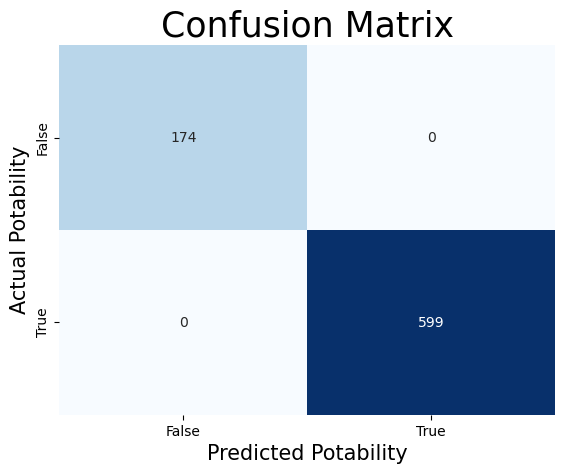

In [71]:
cf_matrix = confusion_matrix(decision_tree_model.predict(X_train),y_train)
labels = ['False', 'True']

sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
           xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Potability', fontsize=15)
plt.ylabel('Actual Potability', fontsize=15)
plt.title('Confusion Matrix', fontsize=25);

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]

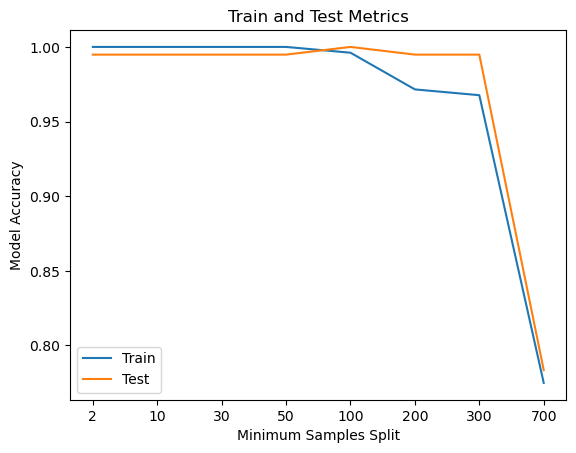

In [65]:
accuracy_list_train = []
f1_list_train = []
accuracy_list_val = []
f1_list_val = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(min_samples_split = min_samples_split,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    f1_train = f1_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    f1_val = f1_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    f1_list_train.append(f1_train)
    accuracy_list_val.append(accuracy_val)
    f1_list_val.append(f1_val)

plt.title('Train and Test Metrics')
plt.xlabel('Minimum Samples Split')
plt.ylabel('Model Accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list) 
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Test']);

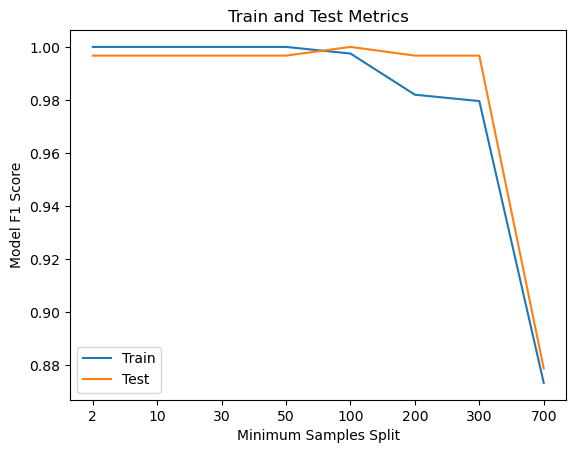

In [66]:
plt.title('Train and Test Metrics')
plt.xlabel('Minimum Samples Split')
plt.ylabel('Model F1 Score')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list) 
plt.plot(f1_list_train)
plt.plot(f1_list_val)
plt.legend(['Train','Test']);

In [75]:
accuracy_list_train

[1.0,
 1.0,
 1.0,
 1.0,
 0.9961190168175937,
 0.9715394566623544,
 0.9676584734799483,
 0.7749029754204398]

In [76]:
f1_list_train

[1.0,
 1.0,
 1.0,
 1.0,
 0.9975020815986678,
 0.9819672131147541,
 0.9795584627964024,
 0.8731778425655976]

In [77]:
accuracy_list_val

[0.9948453608247423,
 0.9948453608247423,
 0.9948453608247423,
 0.9948453608247423,
 1.0,
 0.9948453608247423,
 0.9948453608247423,
 0.7835051546391752]

In [78]:
f1_list_val

[0.9967213114754099,
 0.9967213114754099,
 0.9967213114754099,
 0.9967213114754099,
 1.0,
 0.9967213114754099,
 0.9967213114754099,
 0.8786127167630058]

In [79]:
max_depth_list = [2, 4, 8, 16, 32, 64, None]

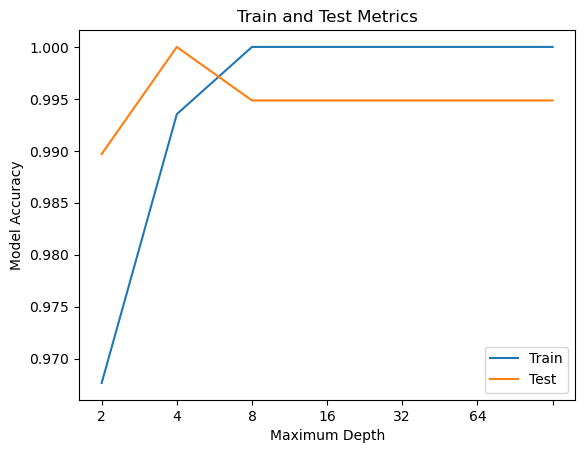

In [80]:
accuracy_list_train = []
f1_list_train = []
accuracy_list_val = []
f1_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(max_depth = max_depth,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    f1_train = f1_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    f1_val = f1_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    f1_list_train.append(f1_train)
    accuracy_list_val.append(accuracy_val)
    f1_list_val.append(f1_val)

plt.title('Train and Test Metrics')
plt.xlabel('Maximum Depth')
plt.ylabel('Model Accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Test']);

In [81]:
accuracy_list_train

[0.9676584734799483, 0.9935316946959897, 1.0, 1.0, 1.0, 1.0, 1.0]

In [82]:
f1_list_train

[0.9795584627964024, 0.9958437240232751, 1.0, 1.0, 1.0, 1.0, 1.0]

In [83]:
accuracy_list_val

[0.9896907216494846,
 1.0,
 0.9948453608247423,
 0.9948453608247423,
 0.9948453608247423,
 0.9948453608247423,
 0.9948453608247423]

In [84]:
f1_list_val

[0.9934640522875817,
 1.0,
 0.9967213114754099,
 0.9967213114754099,
 0.9967213114754099,
 0.9967213114754099,
 0.9967213114754099]

In [67]:
max_depth_list = [2, 3, 4, 5, 6, 7, 8, 9, 10]

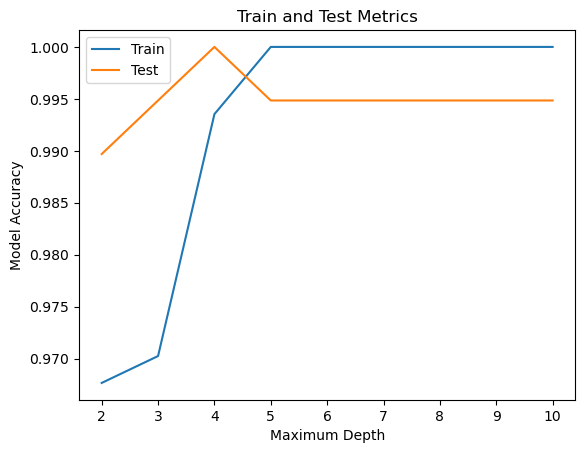

In [68]:
accuracy_list_train = []
f1_list_train = []
accuracy_list_val = []
f1_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(max_depth = max_depth,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    f1_train = f1_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    f1_val = f1_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    f1_list_train.append(f1_train)
    accuracy_list_val.append(accuracy_val)
    f1_list_val.append(f1_val)

plt.title('Train and Test Metrics')
plt.xlabel('Maximum Depth')
plt.ylabel('Model Accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Test']);

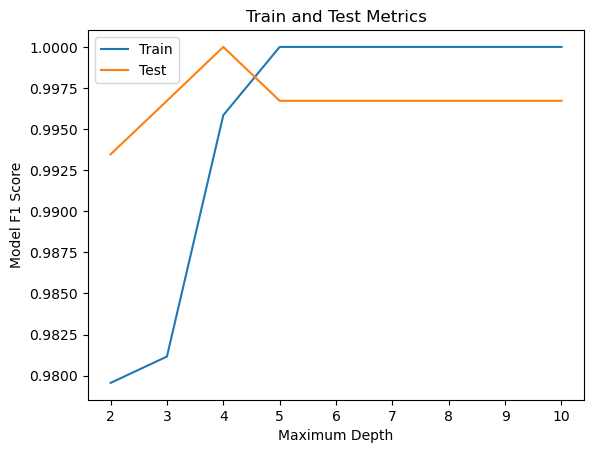

In [70]:
plt.title('Train and Test Metrics')
plt.xlabel('Maximum Depth')
plt.ylabel('Model F1 Score')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(f1_list_train)
plt.plot(f1_list_val)
plt.legend(['Train','Test']);

In [87]:
accuracy_list_train

[0.9676584734799483,
 0.9702457956015524,
 0.9935316946959897,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [88]:
f1_list_train

[0.9795584627964024,
 0.9811629811629812,
 0.9958437240232751,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [89]:
accuracy_list_val

[0.9896907216494846,
 0.9948453608247423,
 1.0,
 0.9948453608247423,
 0.9948453608247423,
 0.9948453608247423,
 0.9948453608247423,
 0.9948453608247423,
 0.9948453608247423]

In [90]:
f1_list_val

[0.9934640522875817,
 0.9967213114754099,
 1.0,
 0.9967213114754099,
 0.9967213114754099,
 0.9967213114754099,
 0.9967213114754099,
 0.9967213114754099,
 0.9967213114754099]

In [91]:
n_estimators_list = [10,50,100,500,1000,2000]

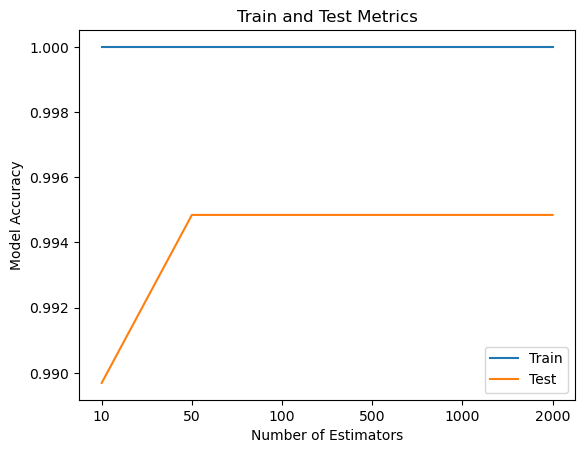

In [92]:
accuracy_list_train = []
f1_list_train = []
accuracy_list_val = []
f1_list_val = []
for n_estimators in n_estimators_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(n_estimators = n_estimators,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    f1_train = f1_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    f1_val = f1_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    f1_list_train.append(f1_train)
    accuracy_list_val.append(accuracy_val)
    f1_list_val.append(f1_val)

plt.title('Train and Test Metrics')
plt.xlabel('Number of Estimators')
plt.ylabel('Model Accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Test']);

In [93]:
accuracy_list_train

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [94]:
f1_list_train

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [95]:
accuracy_list_val

[0.9896907216494846,
 0.9948453608247423,
 0.9948453608247423,
 0.9948453608247423,
 0.9948453608247423,
 0.9948453608247423]

In [96]:
f1_list_val

[0.993421052631579,
 0.9967213114754099,
 0.9967213114754099,
 0.9967213114754099,
 0.9967213114754099,
 0.9967213114754099]

In [71]:
n_estimators_list = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

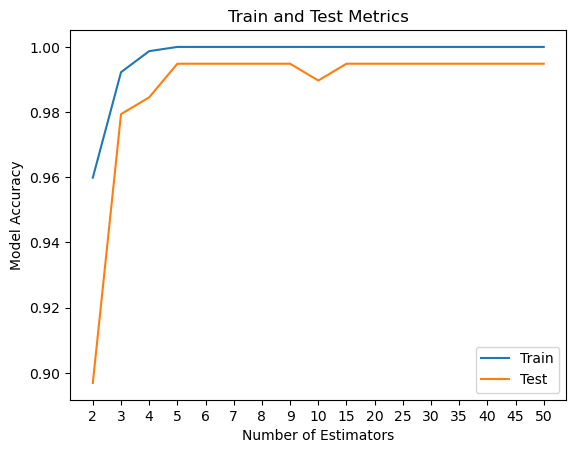

In [72]:
accuracy_list_train = []
f1_list_train = []
accuracy_list_val = []
f1_list_val = []
for n_estimators in n_estimators_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(n_estimators = n_estimators,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    f1_train = f1_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    f1_val = f1_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    f1_list_train.append(f1_train)
    accuracy_list_val.append(accuracy_val)
    f1_list_val.append(f1_val)

plt.title('Train and Test Metrics')
plt.xlabel('Number of Estimators')
plt.ylabel('Model Accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Test']);

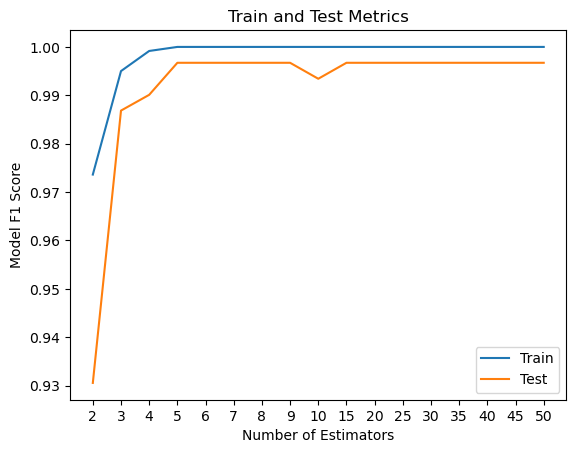

In [73]:
plt.title('Train and Test Metrics')
plt.xlabel('Number of Estimators')
plt.ylabel('Model F1 Score')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(f1_list_train)
plt.plot(f1_list_val)
plt.legend(['Train','Test']);

In [99]:
accuracy_list_train

[0.9598965071151359,
 0.9922380336351876,
 0.9987063389391979,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [100]:
f1_list_train

[0.9736170212765958,
 0.9950083194675541,
 0.9991645781119466,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [101]:
accuracy_list_val

[0.8969072164948454,
 0.979381443298969,
 0.9845360824742269,
 0.9948453608247423,
 0.9948453608247423,
 0.9948453608247423,
 0.9948453608247423,
 0.9948453608247423,
 0.9896907216494846,
 0.9948453608247423,
 0.9948453608247423,
 0.9948453608247423,
 0.9948453608247423,
 0.9948453608247423,
 0.9948453608247423,
 0.9948453608247423,
 0.9948453608247423]

In [102]:
f1_list_val

[0.9305555555555556,
 0.9868421052631579,
 0.9900990099009901,
 0.9967213114754099,
 0.9967213114754099,
 0.9967213114754099,
 0.9967213114754099,
 0.9967213114754099,
 0.993421052631579,
 0.9967213114754099,
 0.9967213114754099,
 0.9967213114754099,
 0.9967213114754099,
 0.9967213114754099,
 0.9967213114754099,
 0.9967213114754099,
 0.9967213114754099]

    Chosen max_depth = 5
    Chosen n_estimators = 5
    Chosen min_samples_split = 100

In [103]:
random_forest_model = RandomForestClassifier(n_estimators = 5,
                                             max_depth = 5, 
                                             min_samples_split = 100).fit(X_train,y_train)

In [104]:
for feature, importance in tuple(zip(random_forest_model.feature_names_in_,
                                     random_forest_model.feature_importances_)):
    print(f"{feature}: {importance:.4f}")

Temperature: 0.0000
D.O: 0.1001
pH: 0.7595
Conductivity: 0.0056
B.O.D: 0.0000
Nitrate: 0.0660
Totalcaliform: 0.0688


In [105]:
print(f"Accuracy for train:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_train),y_train):.4f}")
print(f"f1 for train:\n\tf1 score: {f1_score(random_forest_model.predict(X_train),y_train):.4f}")
print(f"Accuracy for validation:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_val),y_val):.4f}")
print(f"f1 for validation:\n\tf1 score: {f1_score(random_forest_model.predict(X_val),y_val):.4f}")

Accuracy for train:
	Accuracy score: 0.9871
f1 for train:
	f1 score: 0.9917
Accuracy for validation:
	Accuracy score: 0.9897
f1 for validation:
	f1 score: 0.9935


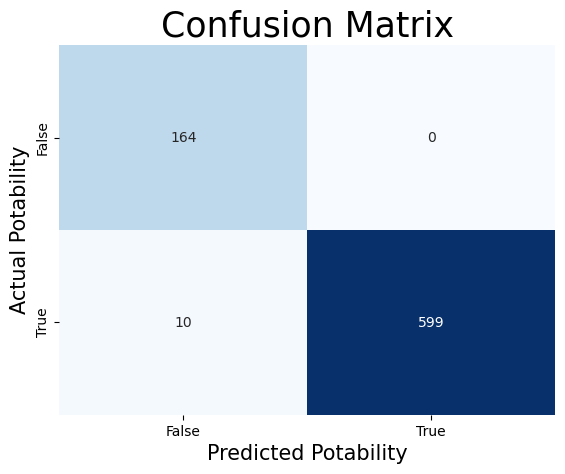

In [106]:
cf_matrix = confusion_matrix(random_forest_model.predict(X_train),y_train)
labels = ['False', 'True']

sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
           xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Potability', fontsize=15)
plt.ylabel('Actual Potability', fontsize=15)
plt.title('Confusion Matrix', fontsize=25);

In [107]:
from xgboost import XGBClassifier

In [108]:
X_train, X_val, y_train, y_val = train_test_split(X.values, y.values, train_size = 0.8, random_state = 123)

In [109]:
n = int(len(X_train)*0.8) ## Let's use 80% to train and 20% to eval

In [110]:
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]

In [111]:
X_train.shape

(773, 7)

In [112]:
xgb_model = XGBClassifier(n_estimators = 500, learning_rate = 0.1,verbosity = 1,random_state = 123)
xgb_model.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)])

[0]	validation_0-logloss:0.60012
[1]	validation_0-logloss:0.52364
[2]	validation_0-logloss:0.45966
[3]	validation_0-logloss:0.40546
[4]	validation_0-logloss:0.35906
[5]	validation_0-logloss:0.31902
[6]	validation_0-logloss:0.28424
[7]	validation_0-logloss:0.25386
[8]	validation_0-logloss:0.22720
[9]	validation_0-logloss:0.20372
[10]	validation_0-logloss:0.18296
[11]	validation_0-logloss:0.16457
[12]	validation_0-logloss:0.14822
[13]	validation_0-logloss:0.13367
[14]	validation_0-logloss:0.12068
[15]	validation_0-logloss:0.10908
[16]	validation_0-logloss:0.09869
[17]	validation_0-logloss:0.08939
[18]	validation_0-logloss:0.08103
[19]	validation_0-logloss:0.07353
[20]	validation_0-logloss:0.06679
[21]	validation_0-logloss:0.06072
[22]	validation_0-logloss:0.05525
[23]	validation_0-logloss:0.05032
[24]	validation_0-logloss:0.04588
[25]	validation_0-logloss:0.04187
[26]	validation_0-logloss:0.03825
[27]	validation_0-logloss:0.03497
[28]	validation_0-logloss:0.03201
[29]	validation_0-loglos

[238]	validation_0-logloss:0.00448
[239]	validation_0-logloss:0.00448
[240]	validation_0-logloss:0.00449
[241]	validation_0-logloss:0.00448
[242]	validation_0-logloss:0.00448
[243]	validation_0-logloss:0.00448
[244]	validation_0-logloss:0.00448
[245]	validation_0-logloss:0.00447
[246]	validation_0-logloss:0.00447
[247]	validation_0-logloss:0.00447
[248]	validation_0-logloss:0.00447
[249]	validation_0-logloss:0.00447
[250]	validation_0-logloss:0.00447
[251]	validation_0-logloss:0.00447
[252]	validation_0-logloss:0.00446
[253]	validation_0-logloss:0.00446
[254]	validation_0-logloss:0.00446
[255]	validation_0-logloss:0.00446
[256]	validation_0-logloss:0.00446
[257]	validation_0-logloss:0.00446
[258]	validation_0-logloss:0.00445
[259]	validation_0-logloss:0.00446
[260]	validation_0-logloss:0.00445
[261]	validation_0-logloss:0.00445
[262]	validation_0-logloss:0.00445
[263]	validation_0-logloss:0.00445
[264]	validation_0-logloss:0.00445
[265]	validation_0-logloss:0.00445
[266]	validation_0-l

[473]	validation_0-logloss:0.00440
[474]	validation_0-logloss:0.00440
[475]	validation_0-logloss:0.00440
[476]	validation_0-logloss:0.00440
[477]	validation_0-logloss:0.00440
[478]	validation_0-logloss:0.00440
[479]	validation_0-logloss:0.00440
[480]	validation_0-logloss:0.00440
[481]	validation_0-logloss:0.00439
[482]	validation_0-logloss:0.00440
[483]	validation_0-logloss:0.00440
[484]	validation_0-logloss:0.00440
[485]	validation_0-logloss:0.00439
[486]	validation_0-logloss:0.00440
[487]	validation_0-logloss:0.00439
[488]	validation_0-logloss:0.00440
[489]	validation_0-logloss:0.00440
[490]	validation_0-logloss:0.00440
[491]	validation_0-logloss:0.00440
[492]	validation_0-logloss:0.00440
[493]	validation_0-logloss:0.00440
[494]	validation_0-logloss:0.00440
[495]	validation_0-logloss:0.00440
[496]	validation_0-logloss:0.00440
[497]	validation_0-logloss:0.00440
[498]	validation_0-logloss:0.00440
[499]	validation_0-logloss:0.00440


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=123, ...)

In [113]:
xgb_model.best_iteration

499

In [114]:
for feature, importance in tuple(zip(random_forest_model.feature_names_in_,
                                     xgb_model.feature_importances_)):
    print(f"{feature}: {importance:.4f}")

Temperature: 0.0027
D.O: 0.0002
pH: 0.9916
Conductivity: 0.0004
B.O.D: 0.0020
Nitrate: 0.0011
Totalcaliform: 0.0020


In [115]:
print(f"Accuracy for train:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_train),y_train):.4f}\nAccuracy for test:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_val),y_val):.4f}")
print(f"f1 for train:\n\tf1 score: {f1_score(xgb_model.predict(X_train),y_train):.4f}\nf1 for test:\n\tf1 score: {f1_score(xgb_model.predict(X_val),y_val):.4f}")

Accuracy for train:
	Accuracy score: 1.0000
Accuracy for test:
	Accuracy score: 1.0000
f1 for train:
	f1 score: 1.0000
f1 for test:
	f1 score: 1.0000


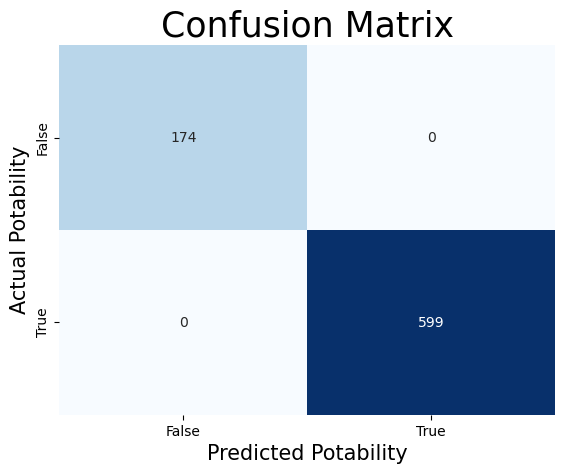

In [116]:
cf_matrix = confusion_matrix(xgb_model.predict(X_train),y_train)
labels = ['False', 'True']

sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
           xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Potability', fontsize=15)
plt.ylabel('Actual Potability', fontsize=15)
plt.title('Confusion Matrix', fontsize=25);

##### Dumping prediction model

In [117]:
# import joblib

In [118]:
# joblib.dump(xgb_model,'model.sav')